# Sparsity and Compressed Sensing

### What is Sparsity?

If we observe a random vector $\mathbf{x}$ of $n \times n$ entries - say an image - we are in all likelihood going to obtain a wholly uninterpretable image of white noise. Natural images can occur in the space of all possible images, despite that space being saturated with total randomness however. The manner in which they occur is what we will exploit to compress these images, such that we may be able to encode them.

Take an image vector $\mathbf{x}$. Let us perform a <i>change of basis</i> on $\mathbf{x}$, such as the **discrete Fourier-Transform** for example -- whatever it is, we will represent the necessary transform as $\Psi$, such that:

$$\mathbf{x} = \mathbf{\Psi} \ \mathbf{s}$$

$\mathbf{s}$ here will be comprised of *mostly* $0$-entries - $\mathbf{s}$ is thus **sparse**.

This will allow us to store *only* those non-zero entries in $\mathbf{s}$, along with the "agreement" that we will encode and decode our image using $\mathbf{\Psi}$.

$\mathbf{\Psi}$ is what is called a **Universal Basis** - meaning that it may represent any natural image, and not just a specific image. This is contrasted by a **Tailored Basis** (such as the *singular-value Decomposition*), which only compresses images pertaining to a predetermined subset of natural images - such as faces (in the case of the *eigenfaces* example), cats, etc.

### Compressed Sensing

We have seen before from the Fourier Transform, where we are able to take a particular images' Fourier Transform, and truncate 95% of all the Fourier coefficients, and then inverse-Fourier Transform back to something which looks visually indistinct from what we started.

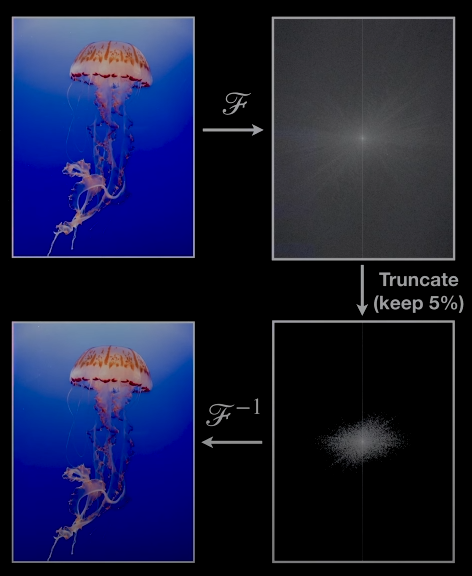



Given this, we may then wonder: "why even sample that much data, if we throw away 95% of it?" If we *only* start with a random sample of 5% of the pixels in an image, for example, and then somehow be able to *infer* the necessary Fourier Coefficients that we may then inverse-Fourier Transform back to the original image, post-compression, we will have **Compressed Sensing**.

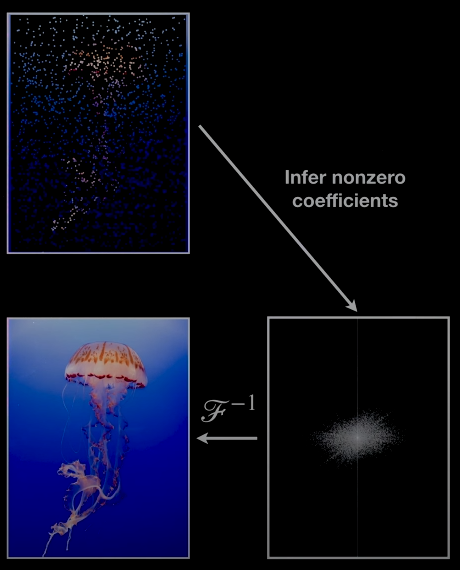

Restated: suppose $\mathbf{y}$ is a *measurement* of $\mathbf{x}$, such that

$$\mathbf{y} = \mathbf{C} \ \mathbf{x}$$

 -- meaning, that we may represent $\mathbf{y}$ in terms of our *sparse* vector $\mathbf{s}$:
 
$$ \implies \mathbf{y} = \mathbf{C} \ \mathbf{\Psi} \ \mathbf{s}$$

Let us call the combined matrix $\mathbf{\Theta} = \mathbf{C} \mathbf{\Psi}$. So:

$$ \implies \mathbf{y} = \mathbf{\Theta} \ \mathbf{s}$$

Remember: we want to try and find the *sparse* image $\mathbf{s}$, but now we have much fewer pixels sampled than before to work with. This means that the number of Fourier Coefficients we want to keep is directly tied to the number of pixels sampled initially.

We also want to ensure we obtain as much *global* information of the image, so we would thus want to ensure the pixels of the image are sampled from random areas of the image to ensure this.

### Mathematical Formulation

Since $\mathbf{s}$ is a very high-dimensional vector, and $\mathbf{y}$ is very low-dimensional:

$$\mathbf{y} = \mathbf{C} \ \mathbf{\Psi} \ \mathbf{s}$$

is underdetermined, so there are an infinite number of solutions to this system of equations. To obtain the *sparsest* $\mathbf{s}$, until approx. 15 years ago, one would have had to iterate over each possible $\mathbf{s}$ that satisfied that system of equations.

To state the problem: we want an $\mathbf{s}$ that minimises the variance between the measurement $\mathbf{y}$ and $\mathbf{C} \mathbf{\Psi} \ \mathbf{s}$:

$$\min \| \mathbf{C} \; \mathbf{\Psi} \ \mathbf{s} - \mathbf{y} \|_2$$

(which as it stands has infinite possible solutions)

But, now what we can do is introduce a further *penalty* to $\mathbf{s}$, where it must also attempt to minimise it's own norm as well:

$$\min \| \mathbf{C} \; \mathbf{\Psi} \ \mathbf{s} - \mathbf{y} \|_2 + \lambda \|\mathbf{s}\|_1$$

In the past, people have tried to minimise the *2-norm* of $\mathbf{s}$ - that is to say, it's length - which makes $\mathbf{s}$ highly dense (since the 2-norm will try to spread the error out as evenly as possible between active terms). The *1-norm*, by contrast, yields solutions that have as many zeroes in the vector as possible.

### Sparsity and the L1 Norm

To recap: we are familiar with optimisation using the L2 norm:

$$\| \mathbf{s} \|_2 = \sqrt{s_1 ^2 + s_2 ^2 + \cdots + s_n ^2}$$

We are trying to solve the *underdetermined* equation:

$$\mathbf{y} = \mathbf{\Theta} \; \mathbf{s}$$

which has an infinite number of solutions for $\mathbf{s}$. We can characterise each of these solutions say (if $\mathbf{s}$ had two components) by plotting them:

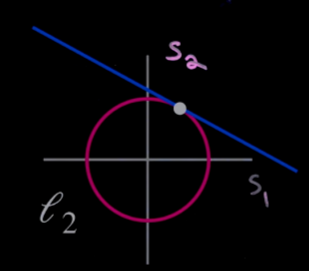

You can see here that the line corresponds to the possible valid solutions to $\mathbf{s}$. Where it intersects the circle, we can see the solution to $\mathbf{s}$ that minimises the *2-norm*. This solution is what we call the **L2 solution** with the smallest *radius*.

However, when  trying to find the *sparsest* solution, we ideally want to minimise the **0-Norm**.

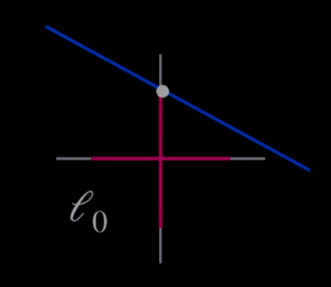

This will have the effect of just counting the anumber of zeroes in the vector, such that it minimises the number of entries that aren't 0. This is not *strictly* a norm, since there is no inner-product that can simply count non-zero entries.

We cannot use *convex optimisation* to minimise this 0-norm -- it is an NP-hard problem. What we do instead though, is we try to minimise the **1-norm**, given by:

$$\|s\|_1 = \|s_1\| + \|s_2\| + \cdots + \|s_n\|$$

or, just the sum of all the components of $\mathbf{s}$

$$\sum_j |\mathbf{s}|_j$$

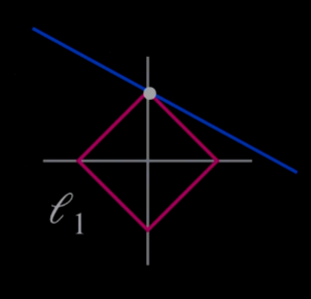

Which often will yield a solution that also minimises the 0-norm. And, at higher dimensions, the analogy generalises better; since the "pointyness" of these diamonds tends to point towards axes that yield sparse solutions.

### Underdetermined Systems and Compressed Sensing

<div class="alert alert-block alert-warning">

Let's illustrate the underdetermination of $\mathbf{y}$. Given our equation:
    
$$ \mathbf{y} = \mathbf{\Theta} \ \mathbf{s}$$
    
We will try solve $\mathbf{s}$ using the 2-norm - that is, by using our least asquares solution - and compare it to using the 1-norm.
    
To find the 2-norm minima, we can take the *Pseudo-inverse* of theta, and matrix-multiply it with $\mathbf{y}$ to obtain our minimised $\mathbf{s}$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = (0.06,0.06,0.06)
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'silver'

n = 1000 # dim of s
p = 200  # number of measurements (dim(y))
Theta = np.random.randn(p, n)
y = np.random.randn(p)

In [3]:
# L2 Minimum norm solution s_L2
s_L2 = np.linalg.pinv(Theta) @ y

<div class="alert alert-block alert-warning">
    Here we have used a random $\mathbf{\Theta}$ and $\mathbf{y}$, to illustrate simply the character of each solution. We can find the 1-norm using the functionality in numpy:

In [ ]:
# L1 Minimum norm solution s_L1
def L1_norm(x):
    return np.linalg.norm(x, ord=1)

constr = ({'type': 'eq',
           'fun' : lambda x : Theta @ x - y})

x0 = s_L2 # Iniitialise with L2 sol.
res = minimize(L1_norm, x0, method='SLSQP', constraints = constr)
s_L1 = res.x

# WATCH OUT! This cell takes a long time to execute

<div class="alert alert-block alert-warning">
    We have a class of <i>constrained</i> optimisation; specifically, we are optimising $\|\mathbf{s}\|_1$ subject to the constraint $\mathbf{y} = \mathbf{\Theta} \mathbf{s}$. It uses an algorithm called "SLSQP".

<div class="alert alert-block alert-warning">
    Let us plot each solution of $\mathbf{s}$, both as the values appear consecutively, and the distribution of values themselves:

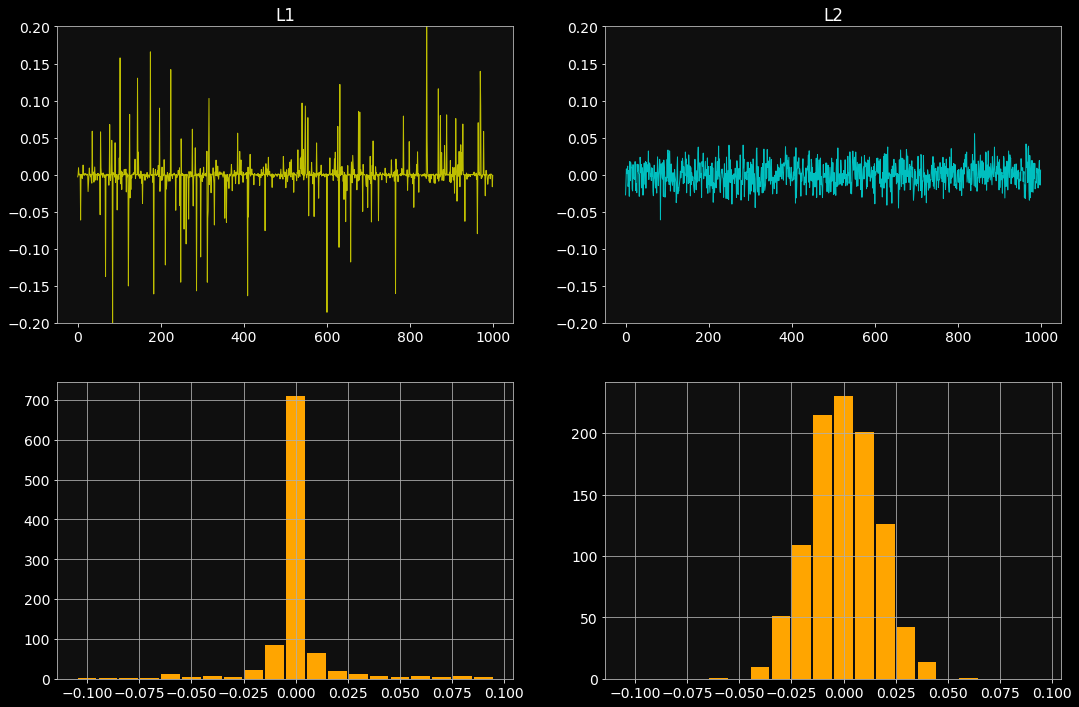

In [11]:
fig, axs = plt.subplots(2, 2)

axs = axs.reshape(-1)
axs[0].plot(s_L1, color = 'y', linewidth=1)
axs[0].set_ylim(-0.2, 0.2)
axs[0].title.set_text("L1")
axs[1].plot(s_L2, color = 'c', linewidth=1)
axs[1].set_ylim(-0.2, 0.2)
axs[1].title.set_text("L2")
axs[2].hist(s_L1, bins=np.arange(-0.105, 0.105, 0.01), rwidth=0.9, color='orange')
axs[2].grid()
axs[3].hist(s_L2, bins=np.arange(-0.105, 0.105, 0.01), rwidth=0.9, color='orange')
axs[3].grid()

plt.show()

<div class="alert alert-block alert-warning">
We can see that, though the 2-norm that we are used to did an excellent job minimising the "radius" of each of our data-points, it does a poor job at being sparse, as there are many non-zero values -- considerably more than a majority.

On the other hand, our 1-norm has sharp "spikes" that are dotted across our $\mathbf{s}$ vector, yet we obtain, in our distribution of values, an overwhelming preponderance of one value - 0, which was our desideratum.

### Shannon Nyquist Sampling Theorem

Often we may be concerned with sampling a signal to obtain information about it -- namely it's frequency content. Intuitively, if we observe some cosine wave with some frequency $\omega$, if we take some amount of samples evenly every second, if there isn't enough samples, interpolating those samples results in an incorrect waveform. This phenomenon is known as **aliasing**.
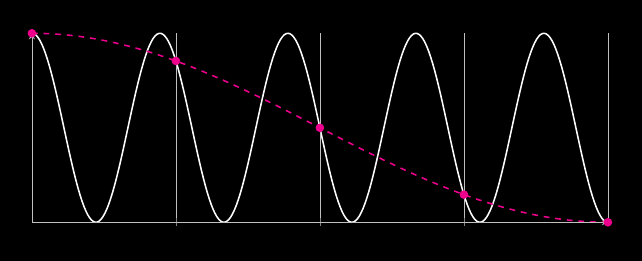

How often, then do we need to sample a signal? If we have some *periodic* signal, we can take it's Fourier Transform to obtain it's frequency data.

We can think of the *sampling process* itself as taking the product of our signal with the **unit pulse train**, defined as the sum of consecutive **unit pulses**, spaced according to our sampling frequency.
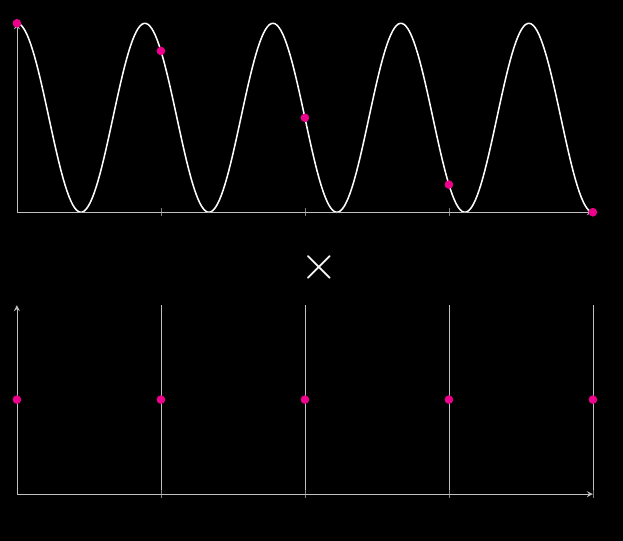

If we take the Fourier Transform of the pulse train, we obtain another pulse train. Thus, we can obtain the Fourier Transform of our sampled signal, by convolving both the Fourier Transform of our signal, and the pulse train, post-Fourier Transform:

$$\mathscr{F} \left( x(t) \cdot p(t) \right) = \mathscr{F} \left( x(t) \right) * \mathscr{F} \left( p(t) \right)$$

where

$$p(t) = \sum_{n=-\infty} ^{\infty} \delta(t - nT_s)$$

for some *sampling period* $T_s$ i.e. just a bunch of unit pulses spaced out by $T_s$ all added together.

<div class="alert alert-block alert-info">

#### Fourier Transform of Pulse-train:

The Fourier Transform of the unit pulse train $p(t)$ is given by:

$$c_{\omega} = \frac{1}{T_s} \int_{-T_s/2} ^{T_s/2} \; p(t) \; e^{\frac{-i 2 \pi \omega t}{T_s}} dt$$

$$\implies c_{\omega} = \frac{1}{T_s} \int_{-T_s/2} ^{T_s/2} \; \sum_{n=-\infty} ^{\infty} \delta(t - nT_s) \; e^{\frac{-i 2 \pi \omega t}{T_s}} dt$$

Since $p(t)$ is essentially a sum of identical unit pulses, just shifted along the x-axis, the integral of each unit pulse should be the same -- 1. Because the areas under their curves are linearly seperable, we can interchange the sum and integral:

$$\implies c_{\omega} = \frac{1}{T_s} \sum_{n=-\infty} ^{\infty} \; \int_{-T_s/2} ^{T_s/2} \;  \delta(t - nT_s) \; e^{\frac{-i 2 \pi \ \omega t}{T_s}} dt$$

Performing $u$-substitution, where $u = t - nT_s$, we obtain:

$$\implies c_{\omega} = \frac{1}{T_s} \sum_{n=-\infty} ^{\infty} \; \int_{-T_{s}/2} ^{T_s/2} \left( \delta(u) \; e^{- \frac{-i \ 2 \pi \ \omega \ n u}{T_s}} du \; e^{-\frac{-i \ 2 \pi \ \omega n T_s}{T_s}} \right)$$

$$\implies c_{\omega} = \frac{1}{T_s} \sum_{n=-\infty} ^{\infty} \; \int_{-T_{s}/2} ^{T_s/2} \left( \delta(u) \; e^{- \frac{-i \ 2 \pi \ \omega \ n u}{T_s}} du \; e^{-i \ 2 \pi \ \omega n} \right)$$

and since that for every $k \in \mathbb{Z}$, $e^{2\pi i K} = 1$, and that $\omega$ and $n$ are both integers (since the Fourier Transform is really only defined where $\omega$ is an integer, we can simplify to:

$$\implies c_{\omega} = \frac{1}{T_s} \sum_{n=-\infty} ^{\infty} \; \int_{-T_{s}/2} ^{T_s/2} \left( \delta(u) \; e^{- \frac{-i \ 2 \pi \ \omega \ n u}{T_s}} du \right)$$



Which, basically means to take the area under the curve of some continuous function within our period, and then move over to the next period and do the same thing. In other words, this just means we take the area under the entire curve.

Thus, we can rewrite:

$$\implies c_{\omega} = \frac{1}{T_s} \; \int_{-\infty} ^{\infty} \left( \delta(u) \; e^{-i \ 2 \pi \ n u \ \frac{\omega}{T_s}} du \right)$$
    
Since the unit impulse is 0 everywhere except at $T_s$, we can <b>sift</b> the value of the signal *at* $T_s$ from the rest of the signal, such that
    
$$ \delta(t) \cdot f(t) = \delta(t) \cdot f(0)$$
    
This is called the <b>sifting property</b> of the unit impulse. We can apply this property to obtain a value for our integral:
    
$$\begin{align} \implies c_{\omega} &= \frac{1}{T_s} \; \int_{-\infty} ^{\infty} \left( \delta(u) \; e^{-i \ 2 \pi \ n \ \frac{\omega}{T_s} \cdot 0} du \right) \\ 
&= \frac{1}{T_s} \int_{-\infty} ^{\infty} \delta(u) \; du = \frac{1}{T_s} \end{align}$$

which if you notice, is it's *own* Fourier Transform from $u$ to $\frac{\omega}{t}$, i.e.
    
$$\implies c_{\omega} = \frac{1}{T_s} P \left(\frac{\omega}{T_s} \right) $$
    
Thus, our Fourier Series is:
    
$$p(t) = \sum_{-\infty} ^{\infty} \; \frac{1}{T_s} e^{-i \frac{2\pi}{T_s} \; \omega t} $$
    
Which we can now take the Fourier Transform of
    
$$P(\omega) = \int_{-\infty} ^{\infty} \sum_{-\infty} ^{\infty} \; \frac{1}{T_s} e^{-i \frac{2\pi}{T_s} \; \omega t} e^{-i \frac{2\pi}{T_s} \; \omega t} dt = \frac{1}{T_s} \sum_{-\infty} ^{\infty} \int_{-\infty} ^{\infty}  \;  e^{-i \frac{4\pi}{T_s} \; \omega t} \; dt$$
    
We can solve $\int_{-\infty} ^{\infty}  \;  e^{-i \frac{4\pi}{T_s} \; \omega t} \; dt$ byy the following:
    
Supposing we multiply the integrand here with a function that apprioaches 1 -- we will use $e^{\epsilon t^2}$, as $\epsilon$ approaches 0:

$$\lim_{\epsilon \to 0} \int_{-\infty} ^{\infty}  \;  e^{-i \frac{4\pi}{T_s} \; \omega t} \cdot e^{\epsilon t^2} dt = e^{-\frac{1}{4\epsilon} \left(\frac{4\pi}{T_s} \; \omega \right)^2} \int_{-\infty} ^{\infty} e^{\left(x \; + \; i \frac{4\pi}{2 T_s \epsilon} \; \omega \right) ^2} dt$$

$$\implies \lim_{\epsilon \to 0} \ e^{-\frac{1}{4\epsilon} \left(\frac{4\pi}{T_s} \; \omega \right)^2} \cdot \sqrt{\frac{\pi}{\epsilon}}$$

which in the limit, becomes the dirac-delta (as we may define the dirac-delta as the Gaussian curve with $\sigma = 0$:

$$ \implies 2 \pi \delta \left(\frac{4\pi}{T_s } \omega \right) $$
    
Hence, our Fourier Transform of our pulse train is:
    
$$ P(\omega) = \frac{2 \pi}{T_s} \sum_{-\infty} ^{\infty} \delta \left(\frac{4\pi}{T_s} \omega \right)$$
    
which is another pulse train!
    
</div class="alert alert-block alert-info">

We know that taking the convolution of a function with a dirac-delta pulse yields the original function, so taking the convolution of the dirac-comb should yield copies of the function, transposed along the $\omega$-axis:

$$\begin{align}
\hat{f}(\omega) * \sum_{-\infty} ^{\infty} 2\pi\delta(\omega - n\omega_0) &= \int_{-\infty} ^{\infty} \hat{f}(\omega) \sum_{-\infty} ^{\infty} 2\pi\delta(\omega - n\omega_0 - \tau) \; d\tau \\
&= \int_{-\infty} ^{\infty} \sum_{-\infty} ^{\infty} \hat{f}(\omega) \; 2\pi\delta(\omega - n\omega_0 - \tau) \; d\tau \\
&=\sum_{-\infty} ^{\infty} \int_{-\infty} ^{\infty}  \hat{f}(\omega) \; 2\pi\delta(\omega - n\omega_0 - \tau) \; d\tau \\
\end{align}$$

$$ \implies \sum_{-\infty} ^{\infty} \hat{f}(\omega) * 2\pi\delta(\omega - n\omega_0)$$

<div class="alert alert-block alert-info">
    
#### Dirac-delta identity under convolution
    
Just as a lemma, we may prove that for some function $f(x)$, taking it's <i>convolution</i> with a Dirac-delta pulse:

$$ f(x) * \delta(x) $$
    
If we take the Fourier Transform of this convolution, we obtain:
    
$$ \mathscr{F}\left(f(x) * \delta(x) \right) = \mathscr{F} \left( f(x) \right) \cdot \mathscr{F} \left( \delta(x) \right) $$
    
and because $\mathscr{F} \left( \delta(x) \right) = 1$, we obtain
    
$$ \mathscr{F}\left(f(x) * \delta(x) \right) = \mathscr{F} \left( f(x) \right) \cdot 1 $$
    
$$ \implies \mathscr{F}\left(f(x) * \delta(x) \right) = \mathscr{F} \left( f(x) \right)$$
    
So returning to the convolution itself, by taking the inverse-Fourier Transform:
    
$$\mathscr{F}^{-1} \mathscr{F}\left(f(x) * \delta(x) \right) = \mathscr{F}^{-1} \mathscr{F} \left( f(x) \right)$$
    
$$\implies f(x) * \delta(x) = f(x)$$
    
Thus under convolution, $\delta(x)$ is an identity element.

</div class="alert alert-block alert-info">

Bringing scaling factors $2\pi$ to the front, we obtain:

$$ \implies 2\pi \sum_{-\infty} ^{\infty} \hat{f}(\omega) * \delta(\omega - n\omega_0)$$

$$ \implies 2\pi \sum_{-\infty} ^{\infty} \hat{f}(\omega - n\omega_0)$$

Which basically acts to copy $\hat{f}(\omega)$ every $T_s$.

In the frequency domain, if we sample a periodic signal, what we obtain then is a series of copies of that signals Fourier transform, spaced according to the sampling rate.


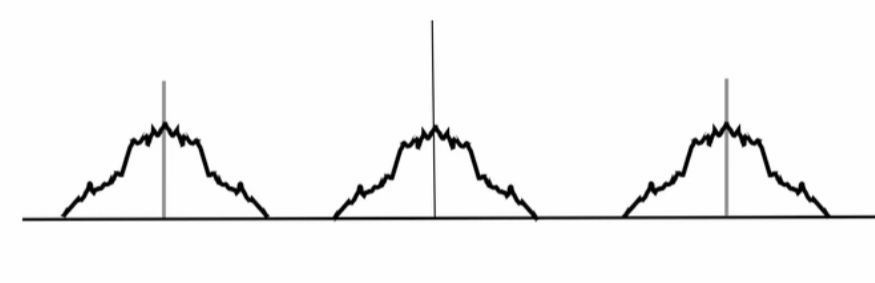

The greatest frequency in this plot is represented by the furthest point in the Fourier Transform. If they are spaced such that the distance between each copy is less than twice the highest frequency sampled, the distributed frequencies overlap, which causes ambiguity. This overlap - determined entirely by the sampling rate - is responsible for the aliasing phenomenon from *undersampling* our signal.

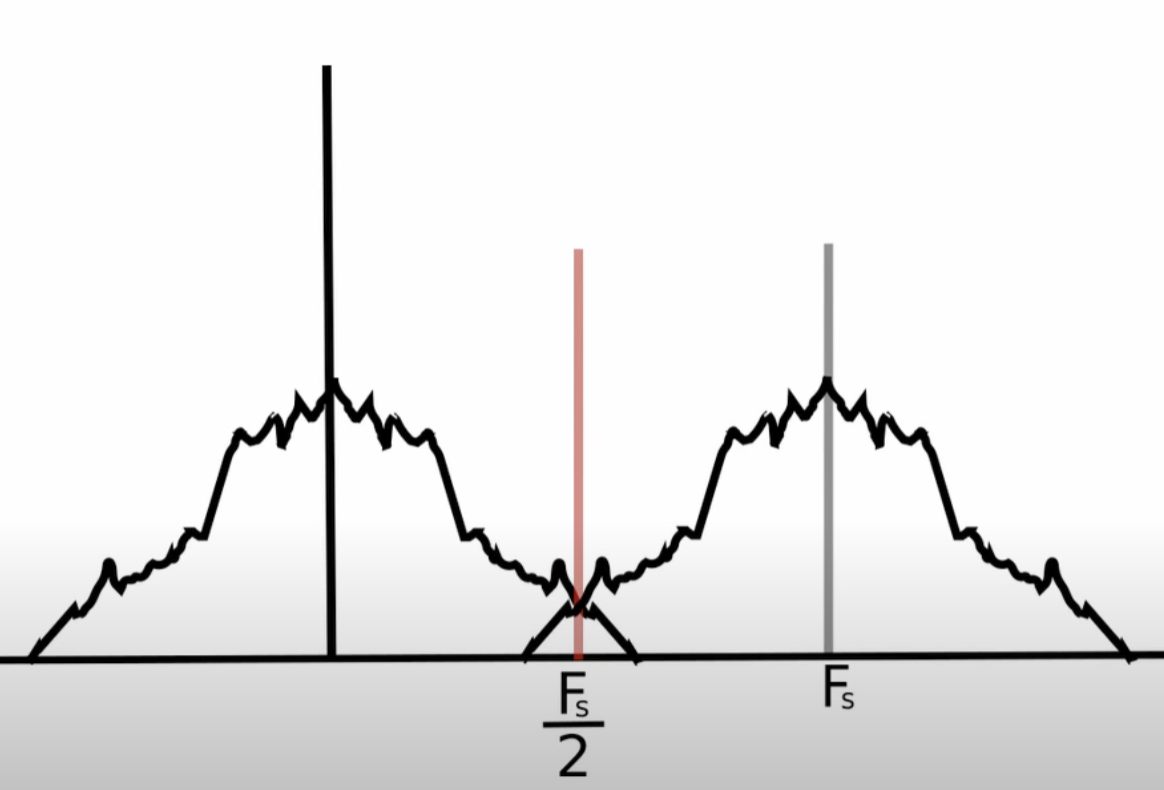
    
Thus, if we want to avoid aliasing, we must ensure this overlap doesn't happen, meaning we need the distance of our unit impulse train in the frequency domain at least twice the highest frequency of the signal i.e. for some signal which is composed of periodic signals with frequencies up to $\omega_n$, in order to reconstruct the signal without aliasing, we must sample the signal at $2\omega_n$, i.e.:

$$\Delta t = \frac{1}{2\omega_n}$$

This is known as the **Shannon-Nyquist sampling theorem**.

### Beating Nyquist with Compressed Sensing

<div class="alert alert-block alert-warning">
Compressed sensing can actually allow us to compress images more efficiently than the limit proven in the <i>Nyquist-Sampling Theorem</i>.

<div class="alert alert-block alert-warning">
We will cook up a toy example, of a high-resolution audio signal, and we will sample from this signal, an obscenely miniscule fraction of the original signal -- in this case we will sample 128 points from the total 4096, well below the Nyquist limit.

C:\Users\Allan\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part


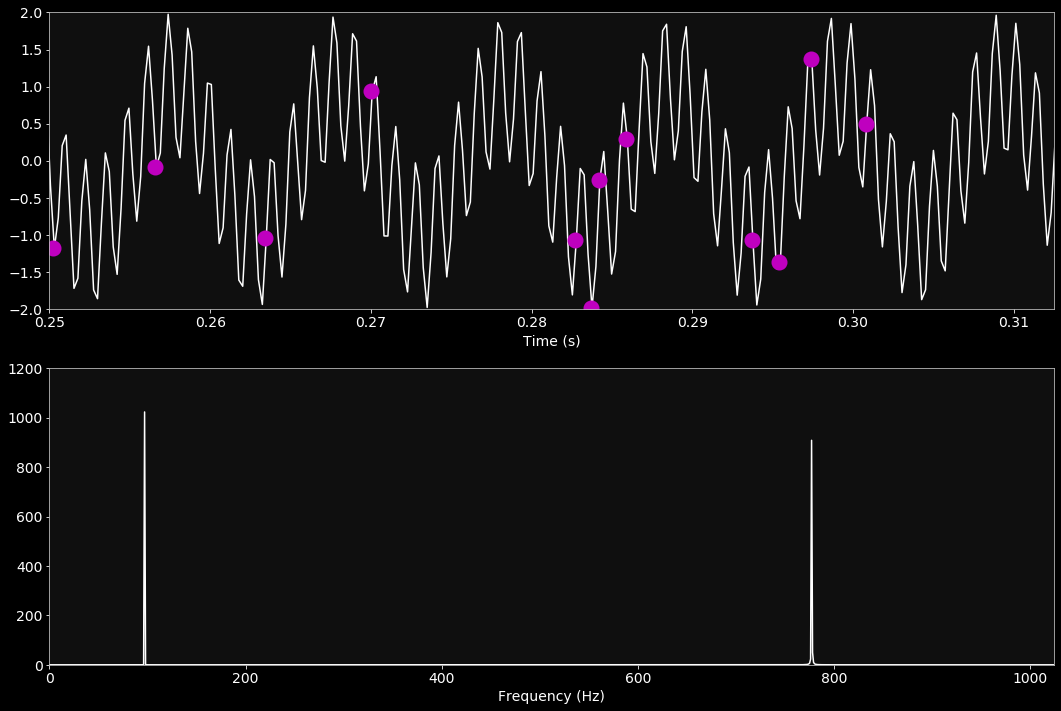

In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = (0.06,0.06,0.06)
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'silver'

# Generate signal; DCT of signal

n = 4096 # points in high resolution signal
t = np.linspace(0, 1, n)
x = np.cos(2 * 97 * np.pi * t) + np.cos(2 * 777 * np.pi * t)
xt = np.fft.fft(x)
PSD = (xt * np.conj(xt) / n).astype(float)

# Randomly sample signal

p = 128 # No. random sasmples -- p = n/32
perm = np.round(np.random.rand(p) * n).astype(int)
y = x[perm]

# Plot 1

time_window = np.array([1024, 1280]) / 4096
freq = np.arange(n)
L = int(np.floor(n/2))

# create the x-axis of frequencies in Hz
freq = np.arange(n)
fig, axs = plt.subplots(2)
axs = axs.reshape(-1)

axs[0].plot(t, x, color='w')
axs[0].plot(perm/n, y, color='m', linewidth=0, marker='o', ms=12, mew=4)
axs[0].set_xlim(time_window[0], time_window[1])
axs[0].set_ylim(-2, 2)
axs[0].set_xlabel("Time (s)")

axs[1].plot(freq[:L], PSD[:L], color='w') # Plot only the first half of freq.s
axs[1].set_xlim(0, 1024)
axs[1].set_ylim(0, 1200)
axs[1].set_xlabel("Frequency (Hz)")

plt.show()

<div class="alert alert-block alert-warning">
    We can see that the random samples end up being spread out pretty evenly, but on occasion they are tightly packed together, which gives us information about the higher-frequency part of the signal. Though the Nyquist Sampling Theorem predicts we won't be able to obtain <i>any</i> information if we sample the signal completely evenly, with random sampling we are able to obtain this information with fewer samples as a result!

<div class="alert alert-block alert-warning">
    We can now try to use this sampled data to try and reconstruct our initial signal. To do this, we will take our $\mathbf{\Psi}$ as the discrete (cosine) Fourier Transform, and $\mathbf{C}$ will take out all the values defined by the ``perm`` variable, to construct $\mathbf{\Theta}$. To find $\mathbf{s}$ that minimises the 1-norm, we will use an algorithm called <b>compressive-sampling matching pursuit</b>, which is a greedy algorithm that specialises in solving the 1-norm for sparse vectors.

In [111]:
import os
import sys
from scipy.fftpack import dct, idct
from scipy.optimize import minimize
cwd = os.getcwd()
sys.path.append(os.path.join('UTILS'))
repo = "https://github.com/avirmaux/CoSaMP"
if 'UTILS' in os.listdir():
    os.system("start /B start cmd.exe @cmd /k cd "+ os.getcwd() + " && git clone " + repo + " UTILS")
    os.system("pip install cosamp")
    os.system("exit")
else:
    pass
#os.chdir("UTILS")

In [95]:
## CoSAmP Code -- ffs I cannot for the life of me get jupyter to import it, so fuck it, copy-paste time.
## Credit to https://github.com/avirmaux/CoSaMP

def cosamp(phi, u, s, epsilon=1e-10, max_iter=1000):
    """
    Return an `s`-sparse approximation of the target signal
    Input:
        - phi, sampling matrix
        - u, noisy sample vector
        - s, sparsity
    """
    a = np.zeros(phi.shape[1])
    v = u
    it = 0 # count
    halt = False
    while not halt:
        it += 1
        print("Iteration {}\r".format(it), end="")
        
        y = np.dot(np.transpose(phi), v)
        omega = np.argsort(y)[-(2*s):] # large components
        omega = np.union1d(omega, a.nonzero()[0]) # use set instead?
        phiT = phi[:, omega]
        b = np.zeros(phi.shape[1])
        # Solve Least Square
        b[omega], _, _, _ = np.linalg.lstsq(phiT, u)
        
        # Get new estimate
        b[np.argsort(b)[:-s]] = 0
        a = b
        
        # Halt criterion
        v_old = v
        v = u - np.dot(phi, a)

        halt = (np.linalg.norm(v - v_old) < epsilon) or \
            np.linalg.norm(v) < epsilon or \
            it > max_iter
        
    return a

In [114]:
# Solve for compressed sensing problem
Psi = dct(np.identity(n)) # Build Psi
Theta = Psi[perm, :]      # Measure rows of Psi

s = cosamp(Theta, y, 10, epsilon=1.e-10, max_iter=10)
xrecon = idct(s)

C:\Users\Allan\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


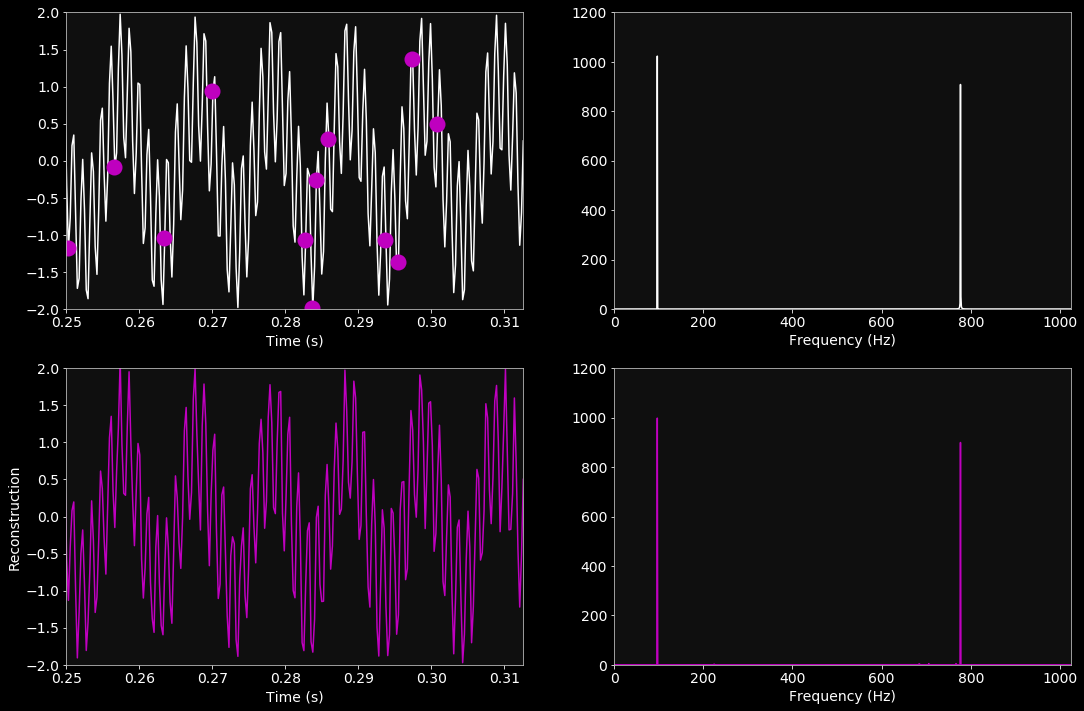

In [117]:
# Plot

time_window = np.array([1024, 1280]) / 4096
freq = np.arange(n)
L = int(np.floor(n/2))

# PSD calc. for reconstruction
xtrecon = np.fft.fft(xrecon, n)
PSDrecon = xtrecon * np.conj(xtrecon)/n

fig, axs = plt.subplots(2, 2)
axs = axs.reshape(-1)

axs[0].plot(t, x, color='w')
axs[0].plot(perm/n, y, color='m', linewidth=0, marker='o', ms=12, mew=4)
axs[0].set_xlim(time_window[0], time_window[1])
axs[0].set_ylim(-2, 2)
axs[0].set_xlabel("Time (s)")

axs[1].plot(freq[:L], PSD[:L], color='w') # Plot only the first half of freq.s
axs[1].set_xlim(0, 1024)
axs[1].set_ylim(0, 1200)
axs[1].set_xlabel("Frequency (Hz)")

axs[2].plot(t, xrecon, color='m')
axs[2].set_xlim(time_window[0], time_window[1])
axs[2].set_ylim(-2, 2)
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Reconstruction")

axs[3].plot(freq[:L], PSDrecon[:L], color='m') # Plot only the first half of freq.s
axs[3].set_xlim(0, 1024)
axs[3].set_ylim(0, 1200)
axs[3].set_xlabel("Frequency (Hz)")


plt.show()

<div class="alert alert-block alert-warning">
    As we can see, the (magenta) reconstructed signal is extremely fast and accurate.

### Compressed Sensing: When It Works

For the compressed sensing problem

$$ \mathbf{y} = \mathbf{C} \mathbf{\Psi} \mathbf{s} $$

We have a series of conditions we need to satisfy for this compressed sensing to actually work:

 - $\mathbf{C}$ needs to be incoherent with respect to $\mathbf{\Psi}$
 
That is to say that the rows of $\mathbf{C}$ to be ostensibly orthogonal to $\mathbf{\Psi}$. If they aren't, and $\mathbf{C}$'s rows are very paralell to $\mathbf{\Psi}$, our sampling will only give us information about that *particular* row, and not other rows.

You can achieve this with measurement matrices that are *randomly* sparse, matrices composed of Gaussian noise, random Bernoulli trials for each entry, etc. so long as there is an element of randomness build in to the measurement.

 - For a $k$-sparse $\mathbf{s}$, the number of measurements $p$ must be such that $p \propto \mathcal{O} \left( k \log \left( \frac{n}{k} \right) \right)$
 
where $k$ means how many non-zero terms there are in $\mathbf{s}$. So we must obtain more measurements the larger our data is e.g. if we have a million dimensional dataset - like a megapixel image, say - and a 5-sparse vector after we take it's Fourier transform, then the number of measurements we have to make should be on the order of $5 \cdot \log(\frac{10^6}{5}) = 25 \cdot \log(2)$, in order to obtain a satisfactory reconstruction.

Given the *proportionality*, this measurement, to be precise, will have a proportionality constant in front of it, such that: $p = K_1 \mathcal{O} \left( k \log \left( \frac{n}{k} \right) \right)$. $K_1$ here is related to the **inner product** between our measurement $\mathbf{C}$ and our transform $\mathbf{\Psi}$ i.e. $\langle \mathbf{C}, \mathbf{\Psi} \rangle$ - which measures how parallell the two are withr espect to eachother i.e. how coherent they are. So $K_1$ is essentatilly dependent on the coherence of $\mathbf{C}$ and $\mathbf{\Psi}$, and will be small if they are incoherent, meaning we have to measure less of the data.

Together, these two conditions are what's called the **restricted isometry property** of some matrix. This means that $\mathbf{C} \mathbf{\Psi}$ is acts as essentally a *unitary* matrix on **sparse** vectors - i.e. they stretcch and rotate vectors, while preserving angles between vectors.

### Robust Reggression with the L1 norm

Suppose we have some data, which has some distribution around a line. If we wish to perform regression, we attempt to find an equation
    
$$y = \alpha x + \beta$$

That minimises some *cost*. We are most used to doing this with respect to what is perenially called the $2-\mathrm{norm}$, where we square the difference between the data and the line $y$, i.e.:
    
$$\min(\|X - (\alpha x + \beta) \|_2 = \sum_j \left( \epsilon_j \right)^2$$
    
But we know that such a minimisation is highly sensitive to outliers, which in certain cases may be undesirable, especially if the true parameter has no bearing on that particular outlier.
    
We often try to fix this by using the $1-\mathrm{norm}$ instead, such that outliers are not counted so heavily, i.e.:
    
$$\min \big(\|X - (\alpha x + \beta) \|_1 \big) = \sum_j | \epsilon_j |$$
    
Discarding the $2-\mathrm{norm}$ has the attendant draw of introducing a biased estimator of the error, so we would use it sparingly, if possible.

<div class="alert alert-block alert-warning">
Let us try this on some random data; looking at our $2-\mathrm{norm}$:

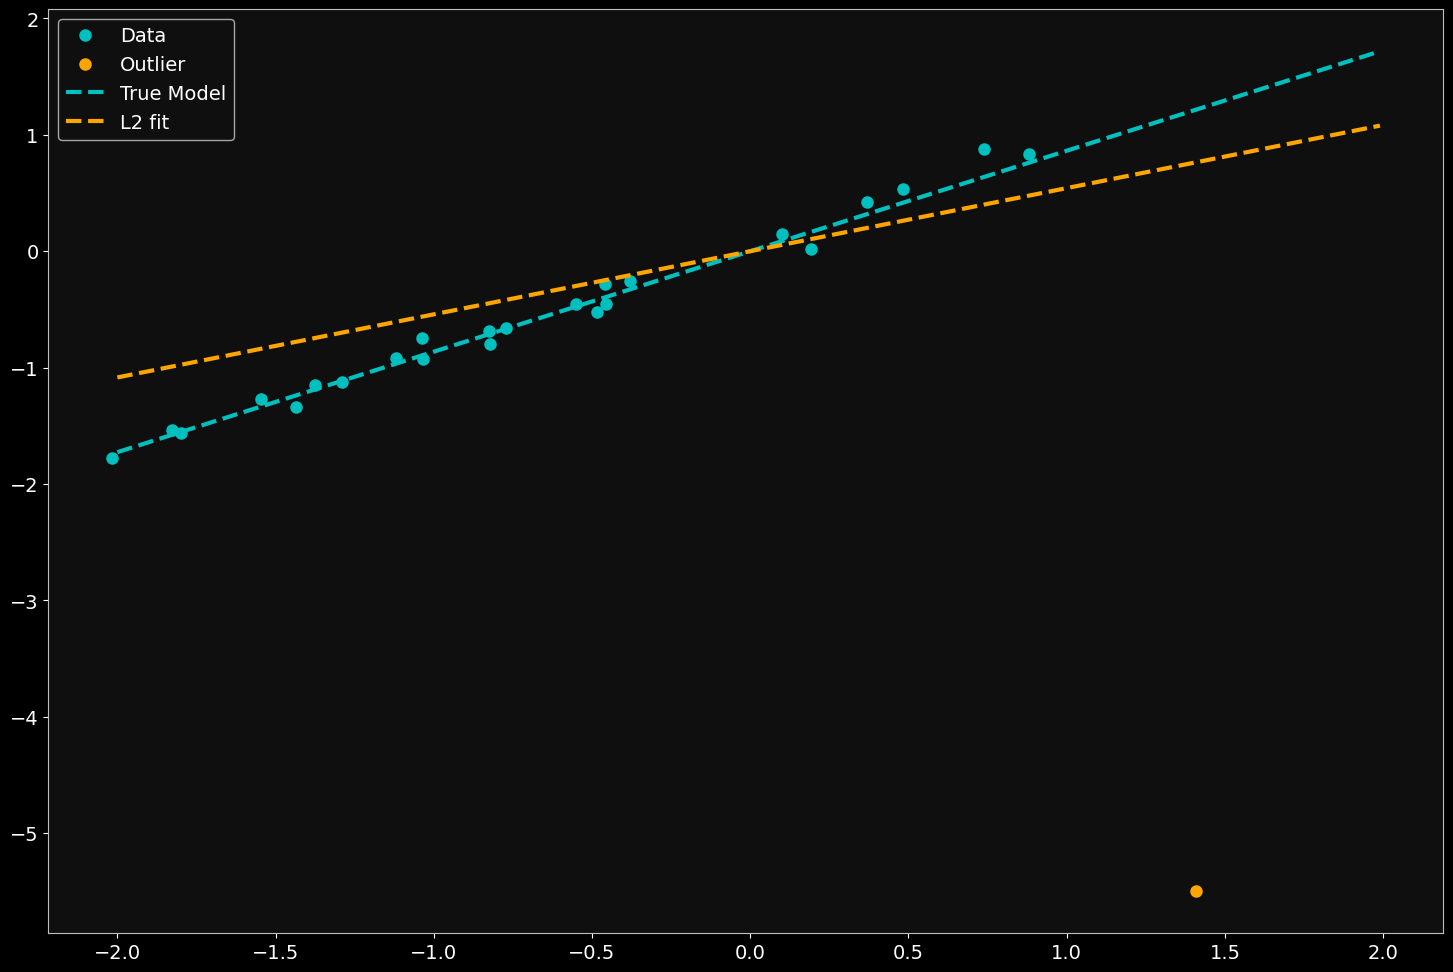

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import minimize
plt.rcParams['figure.figsize'] = [18, 12]
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = (0.06,0.06,0.06)
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'silver'

# Slope w/out outlier:

x = np.sort((np.random.randn(25, 1) - 0.5), axis=0) # Random data from [-2, 2]
b = 0.9 * x + 0.1 * np.random.randn(len(x), 1)          # Line y = 0.9x with noise
atrue = np.linalg.lstsq(x, b, rcond=None)[0]            # Least squares slope w/out outlier
atrue = atrue.item(0)

# Slope with outlier added: 

b[-1] = -5.5                                            # outlier
aL2 = np.linalg.lstsq(x, b, rcond=None)[0]
aL2 = aL2.item(0)

# Plotting:

plt.plot(x[:-1], b[:-1], 'o', color='c', ms=8, label='Data')
plt.plot(x[-1], b[-1], 'o', color='orange', ms=8, label='Outlier')

xgrid = np.arange(-2, 2, 0.01)
plt.plot(xgrid, atrue*xgrid, '--', linewidth=3, color='c', label="True Model")
plt.plot(xgrid, aL2*xgrid, '--', linewidth=3, color='orange', label="L2 fit")
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
    You can see how badly the outlier tilts the entire line.

<div class="alert alert-block alert-warning">
    If we try now with the $1-\mathrm{norm}$:

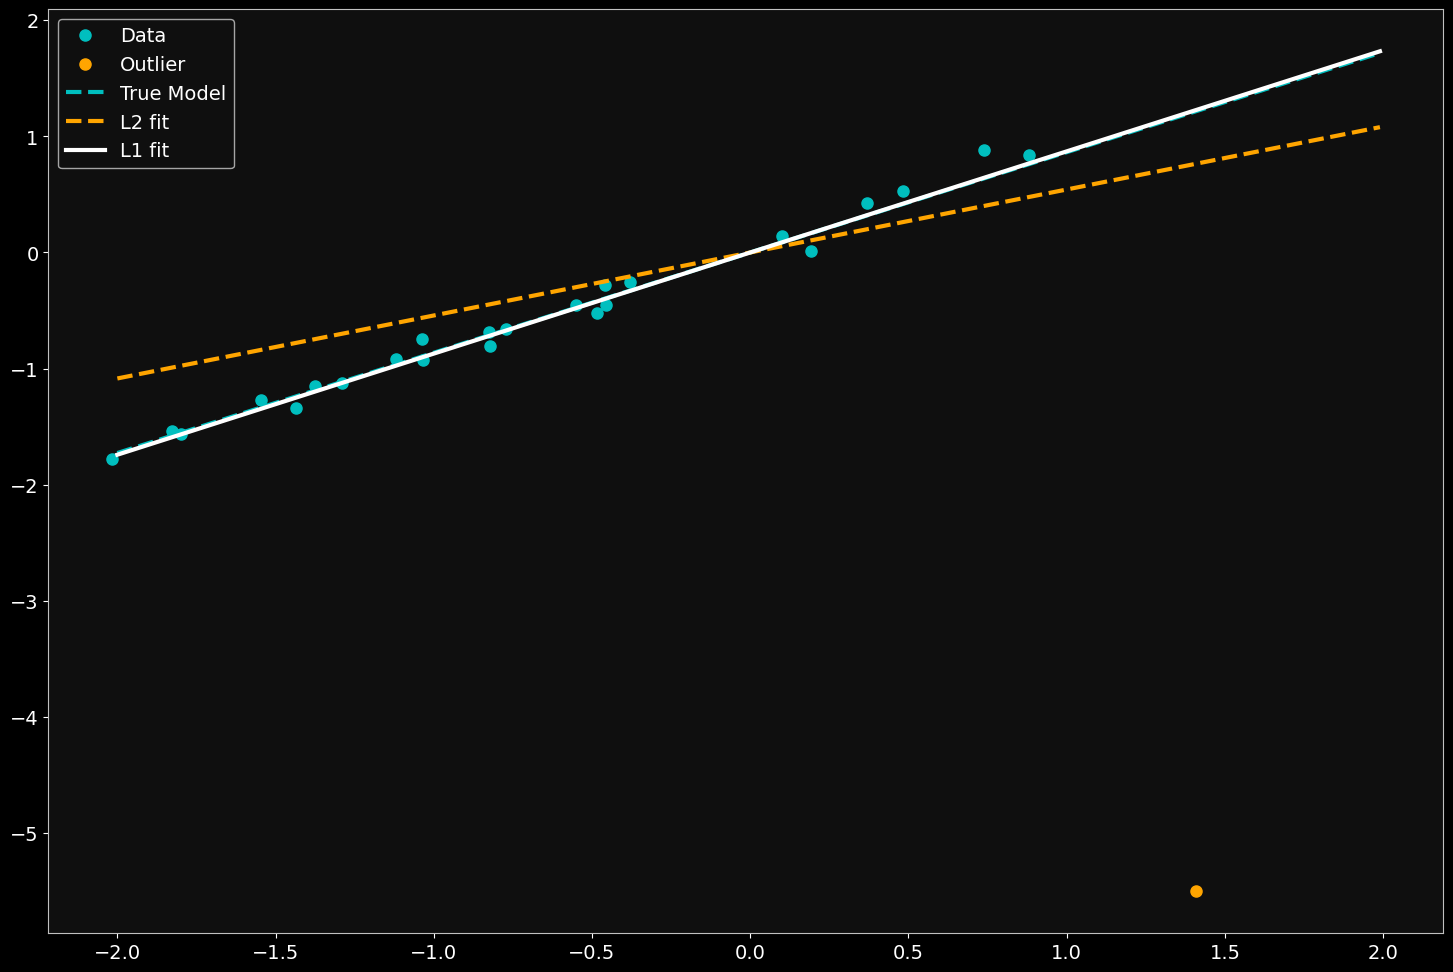

In [27]:
def L1_norm(a):
    return np.linalg.norm(a*x-b, ord=1)

a0 = aL2   # We initialise with our L2 sol.
res = minimize(L1_norm, a0)
aL1 = res.x[0]

# Plotting:

plt.plot(x[:-1], b[:-1], 'o', color='c', ms=8, label='Data')
plt.plot(x[-1], b[-1], 'o', color='orange', ms=8, label='Outlier')

xgrid = np.arange(-2, 2, 0.01)
plt.plot(xgrid, atrue*xgrid, '--', linewidth=3, color='c', label="True Model")
plt.plot(xgrid, aL2*xgrid, '--', linewidth=3, color='orange', label="L2 fit")
plt.plot(xgrid, aL1*xgrid, linewidth=3, color='w', label="L1 fit")
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
Which is essentally exactly on the population parameter!
    
Thus, if we have a dataset we believe is essentially corrupted, we may consider using the L1 norm in regression.

### Robust, Interpretable Statistical Models: Sparse Regression with the LASSO

Very often, a hurdle faced in data-science is the *interpretability* of one's models; we don't wish to have too complex a model, or one with too many parameters - a simpler model is in order. To obtain such a model, we may use a <b>least absolute shrinkage and selection operator</b>, or <b>LASSO</b> algorithm.

Take our *overdetermined* system of linear equations:

$$ \mathbf{y} = \mathbf{A} \mathbf{x}$$

which doesn't have an exact solution, such that the best we can do is find an approximate solution; or, an *underdetermined* case which has many possible solutions such that we try to find a solution in the solution space that is optimal, according to some *loss*.

We write this optimisation problem as:

$$\underset{\mathbf{x}}{\operatorname{argmin}} L(\mathbf{x})$$

We are most used to solving these with *least squares*

$$ L(\mathbf{x}) = \|\mathbf{A} \mathbf{x} - \mathbf{y}\|_2$$

which we know doesn't yield a *sparse* solution.

The oldest way we've known to get around this, is to define our loss, such that we penalise the estimate's likeness of the *data itself*, so we can protect against the linear dependence in the data:

$$ L(\mathbf{x}) = \|\mathbf{A} \mathbf{x} - \mathbf{y}\|_2 + \alpha \|\mathbf{x}\|_2$$

This is known as **Ridge Regression**, or **Tikhonov Regularisation**.

An issue with Tikhonov Regularisation however, is that it still yields a *dense* basis for $\mathbf{x}$, such that it tells us that we still need all the dimesnions in $\mathbf{x}$, and then some, to make predictions about $\mathbf{y}$. We want something that is *sparse*

If we take the Tikhonov regularisation, whereas instead of penalising the 2-norm of $\mathbf{x}$, we penalise the 1-norm:

$$ L(\mathbf{x}) = \|\mathbf{A} \mathbf{x} - \mathbf{y}\|_2 + \lambda \|\mathbf{x}\|_1$$

we obtain the **LASSO**. Optimising for this LASSO now, we find that $\mathbf{x}$ is *sparse*.

This is especially helpful when trying to show our data to non-experts, who may make policy prescriptions; which minimising the number of factors, while still keeping the same amount of error in the model, can provide a more interpretable and clear view of the data, which they may then execute on.

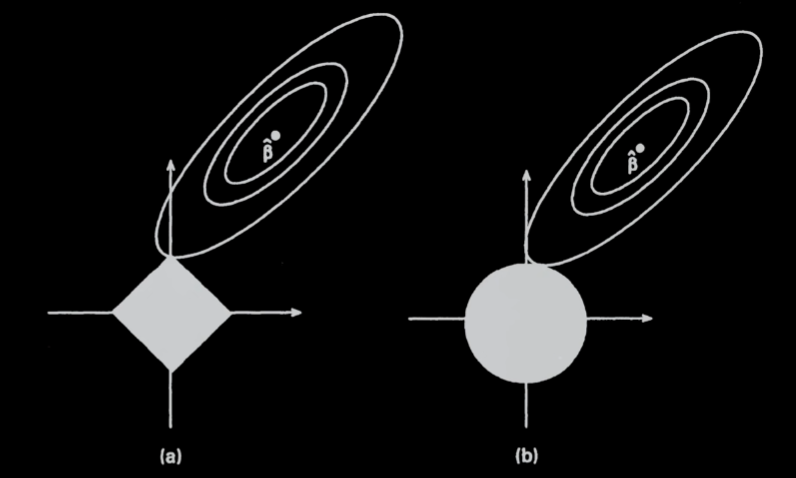

Of course, we may also combine both approaches, to obtain a loss defined as:

$$ L(\mathbf{x}) = \|\mathbf{A} \mathbf{x} - \mathbf{y}\|_2 + \lambda \|\mathbf{x}\|_1 + \alpha \|\mathbf{x}\|_2$$

which gives us both the properties of *linear independence* from Tokhonov, and *sparsity* from LASSO. This is known as the **Elastic Net**, and is closely related to the functioning of modern *support vector machines*.

It's also worth noting, that the coefficient $\lambda$ tunes how affectual the 1-norm is in minimising the error. If you find that, as you increase $\lambda$, terms in $\mathbf{y}$ disappear, they do *not* return at any point.

The LASSO also happens to be useful to protect against overfitting, since the number of terms ends up being penalised in the model, increasing complexity ends up reducing *mean square error* initially, as the effect of the 2-norm outweighs that of the 1-norm, but this effect quickly subsides, and the *mean square error increases* as complexity increases.

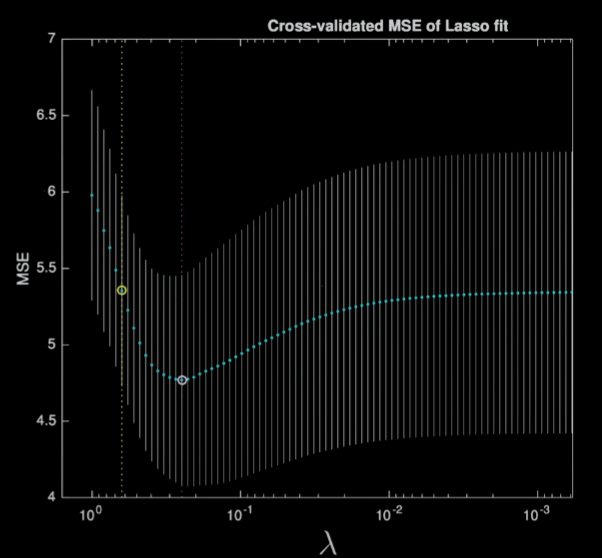

We can take this even further: instead of modelling static trends, as is the case of statistics, we wish to model a dynamical system, we have our series of differential equations 

$$\dot{\mathbf{X}} = \begin{bmatrix} \dot{x} \\ \dot{y} \\ \dot{z} \\ \vdots \end{bmatrix}$$

To construct our basis, we can fill a matrix $\mathbf{\Theta}(\mathbf{X})$ with a swathe of candidate terms that may be on the right hand side of each differential equation, like $\{1 \ \ x \ \ y \ \ z \ \ \cdots \ \ x^2 \ \ y^2 \ \ z^2 \cdots \ \ xy \ \ \cdots \}$, and then try to solve for a sparse *matrix* $\mathbf{\Xi}$ of sparse column vectors $\xi_j$ *using* just LASSO, which may allow us to fill in the right hand side of each differential erquation.

This means that we can predict the dynamics of some system using *just* data alone!

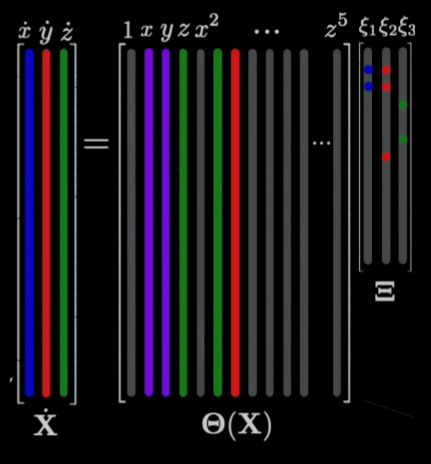

### Sparse Representation for Classification

Suppose we have a library of faces we want to classify, which are corrupted perhaps, or have some kind of occlusions om them.

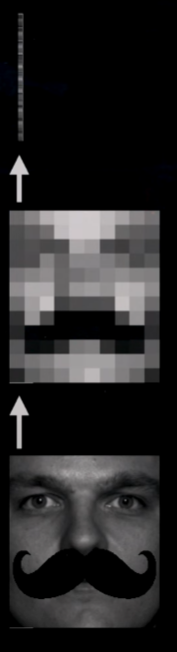

First, let us downsample this image, and then stretch it out into a vector, and let us further do this process for a whole library of like images of different faces. We assume that there are patterns in the data itself.

We can collect our many downsampled face-vectors into a matrix, not so inconspicuously like our $\mathbf{\Theta}$ matrix, which can serve as a basis for our original face.

Now, if we want to *classify/identify* our original image within this library, what we would like is a sparse representation of our original face, so that it can pick out our original image from that library.

We may find a sparse representation of our original face using this basis with the 1-norm, LASSO, elastic nets, etc. and then use each of these coefficients on each face within our *library*, and record the error we obtain as a result. We ought to expect the smallest error will pick out our original face.

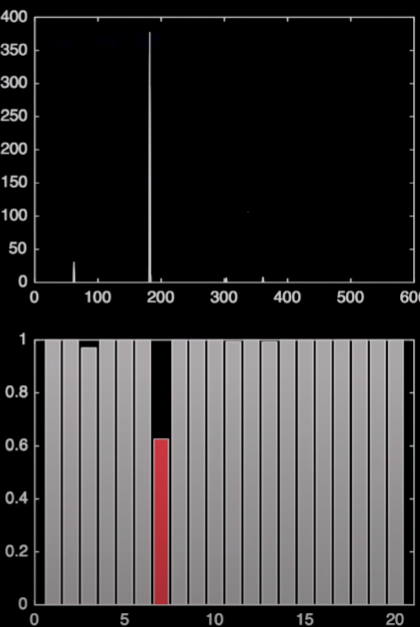

This classification algorithm can struggle with **salt-and-pepper noise** -- sparsely occuring black and white pixels, but is robust to other forms of corruption, including white noise and occlusions.

### Robust Principal Component Analysis

We've seen before how corrupting an influence outliers can be on reggression using L2, and how alleviating it can be to use L1 instead.

PCA can also run into this issue; where we may have a *true* Gaussian cloud of datapoints with a single outlier, performing a standard PCA can skew our principal components fairly significantly.

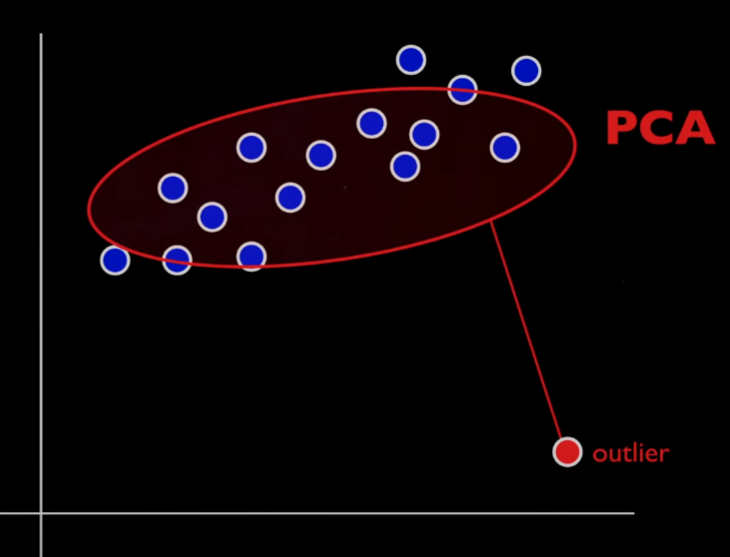

We assume here, that for some corruption $\mathbf{S}$ we impose on an image $\mathbf{L}$, which results in $\mathbf{X}$, we can disentangle that corruption into a sparse matrix, from the original image.

$$\mathbf{X} = \mathbf{L} + \mathbf{S}$$

In order to do this, we need a library of a whole swathe of different examples of different iterations of whatever $\mathbf{L}$ is an instance of, to use as a training set. $\mathbf{L}$ would be very well described by the principal components of the training set; whereas, $\mathbf{S}$ is very poorly described by those principal components.

Notice though, that $\mathbf{X}$ is highly underdetermined; there are an enormous number of ways to split up a matrix into two components, so it would seem like a poorly posed problem. To get what we want from this, we would like ideally, to minimise $\mathbf{L}$'s rank along with $\mathbf{S}$'s representation, given that our above equation is true, i.e.:

$$\underset{\mathbf{L}, \mathbf{S}}{\min} r(\mathbf{L}) + \|\mathbf{S}\|_0$$

subject to:

$$\mathbf{L} + \mathbf{S} = \mathbf{X}$$

which is computationally impractical (to understate it). We can introduce a **convex relaxation** to this problem, such that we replace all the non-convex terms with convex *proxies*.

For rank, we use the **nuclear norm**, given by the sum of singular values, and for the 0-norm, we can proxy the 1-norm, as we've discussed earlier. Thus, our convex relaxation transforms our minimisation into:

$$\underset{\mathbf{L}, \mathbf{S}}{\min} \|\mathbf{L})\|_* + \lambda_0 \|\mathbf{S}\|_1$$

subject to:

$$\mathbf{L} + \mathbf{S} = \mathbf{X}$$

We may solve this using **alternating direction** methods, **Lagrange multiplier** methods, etc.



### Sparse Sensor Placement Optimisation for Reconstruction

We may query now: though compressed sensing affords us well to reconstruct data from a sparse representation, if we sample randomly, could we perhaps do better with a non-random sampling method if we know something about our data?

Let us use a *tailored basis* $\mathbf{\Psi}_r$, instead of our universal basis to transform our vector into it's sparse representation, which we can then sample and use to reconstruct our data. This basis would be a subset of our universal basis, since the universal basis can describe *every* possible configuration of data, so our tailored basis narrowing the possibilities a priori should reduce the dimension of the universal basis - and often, that reduction is significant.

We may then configure our $\mathbf{C}$ matrix accordingly, to take *optimal* measurements given it's attendant tailored basis.

If we take the $\mathbf{QR}$-factorisation of $\mathbf{\Psi}_r$ - which yields a basis which is entirely orthogonal, with scale-factors found in the other matrix - we can obtain this via **column pivoting** for almost rank-deficient matrices. The pivoted columns' locations turn out to be exactly the optimal locations for a measurement.

That is to say, for $\mathbf{\Psi}_r$, we look for the column with the largest 2-norm, or magnitude, and perform Gram-Schmidt's algorithm to find an orthogonal basis for each column in $\mathbf{\Psi}_r$, we find the next largest vector in $\mathbf{\Psi}_r$ post-Gram-Schmidt, and Gram-Schmidt every column with respect to that column, and repeat for each column. 

These largest columns in $\mathbf{Q}$ are our **pivots**, which correspond to our ideal measurements for $\mathbf{C}$ ! 

$$\mathbf{\Psi}_r ^T \mathbf{C}^T = \mathbf{Q} \mathbf{R}$$

This should make intuitive sense, since the length of the vector in $\mathbf{\Psi}_r$ will determine it's importance, and ensuring they are all orthogonal will guarantee incoherence.

### Sparse Sensor Placement Optimisation for Classification

What if we want to try and optimise our sensor placement for classification? That is, in contradistinction to above, if instead of identifying some *particular* instance of a category, if we are only interested in determining whether our data is binarily within one category, or another.

If we consider drawing a line through *natural image space*, where on the one side we have one category, and on the other side we have the other, we have no interest in any information perpendicular to that line.

If we have some data about each category - say, some images of instances of each category, for example - we may first perform a transform $\mathbf{\Psi}$ to obtain a sparse representation; we can use the SVD, as a tailored basis. We hope now, that our tailored basis can extract out a sparse representation that our categories may *cluster* around.

$$\mathrm{Data} \overset{\mathbf{\Psi}}{\longrightarrow} \mathrm{Patterns} \overset{\mathbf{w}}{\longrightarrow} \mathrm{Classification}$$

Much like as we have done with PCA before.

Now we can perform our **targeted sensor placement**; we use the algorithm:

$$\mathbf{s} = \underset{\mathbf{s'}}{\operatorname{argmin}} \|\mathbf{s}'\|_1$$

such that:

$$\mathbf{\Psi}^T \mathbf{s} = \mathbf{w}$$